# Projet de Statistique : Analyse du Jeu de Données meteoSDD

# Auteurs
DUSOLLIER Baptiste ; GERARD François ; SECHET Edouard ; GUILLARME Côme ; GUEDJ Alexandre ; HOUSSENALY Ali

## Partie 1 : Présentation et analyse exploratoire des données

### Import et aperçu

In [37]:
# Installation des packages si nécessaire
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("patchwork")) install.packages("patchwork")
if (!require("ggcorrplot")) install.packages("ggcorrplot")
if (!require("dplyr")) install.packages("dplyr")

# Chargement des packages
library(ggplot2)
library(patchwork)
library(rlang)
library(ggcorrplot)
library(dplyr)

In [38]:
# Lecture du fichier CSV
data <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";")

In [39]:
# Aperçu des premières lignes
head(data)

# Dimensions du jeu de données
cat("Dimensions du jeu de données :", dim(data)[1], "lignes et", dim(data)[2], "colonnes\n")

# Noms des colonnes
cat("Noms des colonnes :", names(data), "\n")

ID.OMM.station Date                      Pression.au.niveau.mer
1  7690          2017-04-05T11:00:00+02:00 101580                
2 61998          2017-04-05T11:00:00+02:00 102720                
3 78925          2018-04-04T05:00:00+02:00 101420                
4 61998          2018-04-05T05:00:00+02:00 101190                
5  7690          2018-04-05T08:00:00+02:00 101240                
6  7149          2018-04-08T05:00:00+02:00 100730                
  Variation.de.pression.en.3.heures Type.de.tendance.barométrique
1  100                              2                            
2 -200                              8                            
3   60                              1                            
4   40                              1                            
5  -20                              5                            
6  -20                              5                            
  Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température
1  90                            1.3                        289.95     
2 320                           20.1                        285.65     
3 100                            3.6                        298.45     
4 290                            5.1                        278.15     
5 320                            1.6                        284.25     
6  30                            2.3                        285.55     
  Point.de.rosée Humidité ⋯ Altitude communes..name. communes..code.
1 285.25         74       ⋯  2       Nice            06088          
2 281.95         78       ⋯ 29                                      
3 295.15         82       ⋯  3       Le Lamentin     97213          
4 272.75         68       ⋯ 29                                      
5 280.15         76       ⋯  2       Nice            06088          
6 283.25         86       ⋯ 89       Athis-Mons      91027          
  EPCI..name.                   EPCI..code. department..name. department..code.
1 Métropole Nice Côte d'Azur    200030195   Alpes-Maritimes   06               
2                                      NA                                      
3 CA du Centre de la Martinique 249720061   Martinique        972              
4                                      NA                                      
5 Métropole Nice Côte d'Azur    200030195   Alpes-Maritimes   06               
6 Métropole du Grand Paris      200054781   Essonne           91               
  region..name.              region..code. mois_de_l_annee
1 Provence-Alpes-Côte d'Azur 93            4              
2                            NA            4              
3 Martinique                  2            4              
4                            NA            4              
5 Provence-Alpes-Côte d'Azur 93            4              
6 Île-de-France              11            4

Dimensions du jeu de données : 1719567 lignes et 82 colonnes
Noms des colonnes : ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Température Point.de.rosée Humidité Visibilité.horizontale Temps.présent Temps.passé.1 Temps.passé.2 Nebulosité.totale Nébulosité..des.nuages.de.l..étage.inférieur Hauteur.de.la.base.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.inférieur Type.des.nuages.de.l.étage.moyen Type.des.nuages.de.l.étage.supérieur Pression.station Niveau.barométrique Géopotentiel Variation.de.pression.en.24.heures Température.minimale.sur.12.heures Température.minimale.sur.24.heures Température.maximale.sur.12.heures Température.maximale.sur.24.heures Température.minimale.du.sol.sur.12.heures Méthode.de.mesure.Température.du.thermomètre.mouillé Température.du.thermomètre.mouillé Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure

### Visualisation des données manquantes

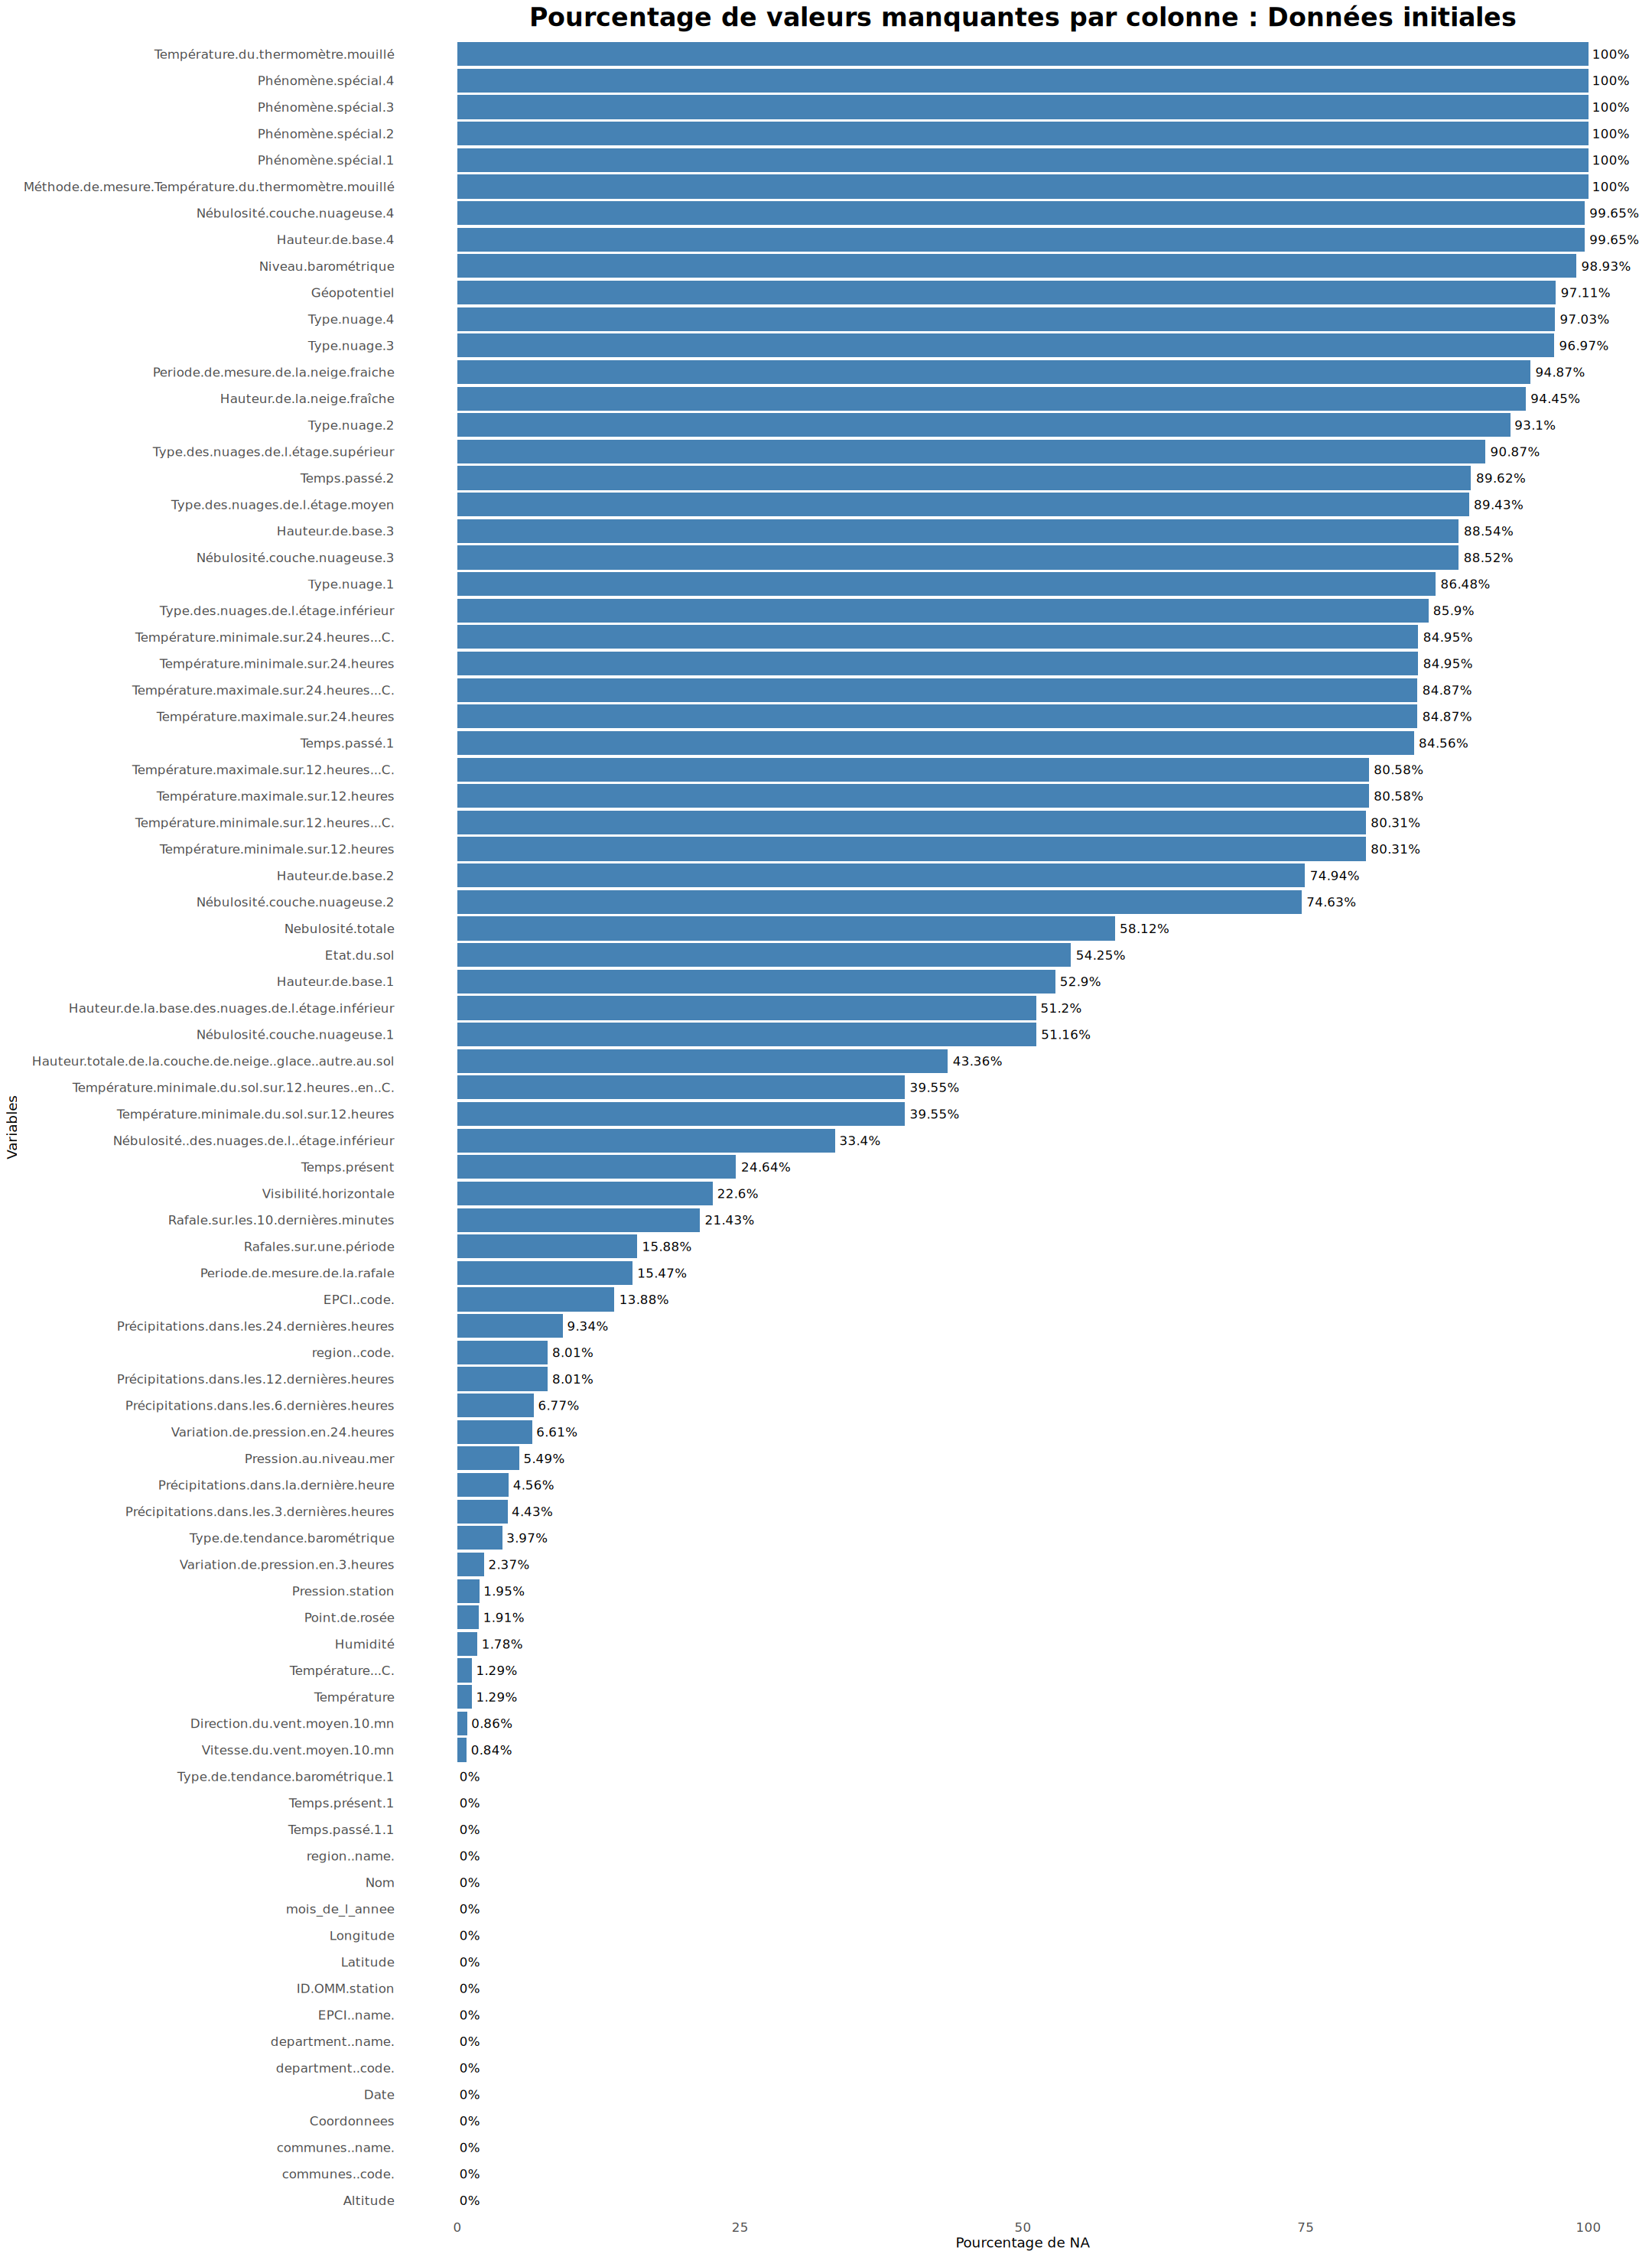

In [40]:
# Taille du graphique
options(repr.plot.width = 18, repr.plot.height = max(6, 0.3 * ncol(data)))

# Calcul du pourcentage de NA
na_percent <- sapply(data, function(x) mean(is.na(x)) * 100)
na_df <- data.frame(Variable = names(na_percent), NA_Percent = round(na_percent, 2))
na_df <- na_df[order(na_df$NA_Percent, decreasing = TRUE), ]

# Graphique
ggplot(na_df, aes(x = reorder(Variable, NA_Percent), y = NA_Percent)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(NA_Percent, "%")), hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(title = "Pourcentage de valeurs manquantes par colonne : Données initiales",
       x = "Variables",
       y = "Pourcentage de NA") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

### Méthodologie d'approche du jeu de données

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -33.50    8.80   15.00   15.41   23.50   59.70   22176 

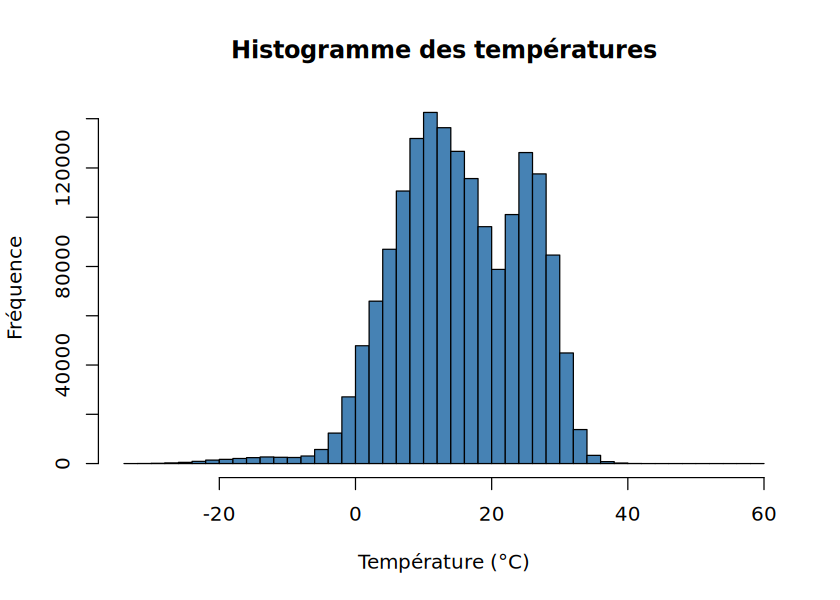

In [41]:
# Statistiques de base sur la température
summary(data$Température...C.)

# Taille du graphique
options(repr.plot.width = 7, repr.plot.height = 5)

# Histogramme des températures
hist(data_final$Température...C., 
     breaks = 50,  # Définit le nombre de barres
     main = "Histogramme des températures", 
     xlab = "Température (°C)", 
     ylab = "Fréquence",
     col = "steelblue", 
     border = "black")

Sur la base des graphes ci-dessus, tout au long de ce projet, nous prendrons comme indicateur cible **la température**. En effet :

- Elle est continue (elle peut prendre toute les valeurs dans l'intervalle : $[-33°C, 60°C]$), assez bien distribuée (on observe une répartition approximativement normale sur l'intervalle $[-5°C, 40°C]$), et présente dans presque toutes les lignes (seulement 1.29% des lignes sont vides pour cette variable)

- Elle est physiquement influencée par de nombreuses autres variables : pression, humidité, vent, précipitations, etc.

- Elle est interprétable : facile à relier à des phénomènes météo ou géographiques

- Elle est utile pour toutes les étapes suivantes :
    - Estimateurs : moyenne, variance, biais
    - Tests : comparaison entre régions ou saisons
    - Régression : prédiction à partir d'autres variables
    - ACP/PLS : réduction de dimension autour de la température
    - Clustering : regroupement de stations ou de jours selon profils thermique


Ainsi, pour rendre ce jeu de données plus digeste et sélectionner les éléments dont nous aurons besoin, nous allons prendre plusieurs décisions :

- Toutes les colonnes avec plus de 50 % de données manquantes sont retirées de notre analyse.

- Cette première décision supprime une grande partie des variables concernant la neige. En effet, ces variables ont beaucoup de valeurs manquantes puisqu’il ne neige pas tout au long de l’année. Au vu de cette décision, il est préférable de ne pas considérer la neige dans nos analyses et de supprimer toutes les colonnes restantes la concernant. Cela va nous permettre de simplifier un peu plus le dataset.

- Les colonnes de températures sélectionnées seront les colonnes en degré Celsius pour simplifier l’interprétation. En effet, les colonnes de température sont présentes en Kelvin et en degré Celsius ; il est inutile de conserver les deux.

Ces choix ne visent pas à appauvrir le jeu de données, mais à le rendre plus robuste et cohérent pour l’application des méthodes statistiques vues en cours. Ils permettent de concentrer l’analyse sur des variables fiables, interprétables et comparables.


### Nettoyage du jeu de données

In [42]:
# 1. Supprimer les colonnes avec plus de 50% de NA
na_threshold <- 0.5
na_percent <- sapply(data, function(x) mean(is.na(x)))
data_final <- data[, na_percent <= na_threshold]

# 2. Supprimer la colonne restante liée à la neige
data_final <- data_final[, !grepl("Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol", names(data_final))]

# 3. Conserver uniquement les colonnes de température en °C
data_final <- data_final[, !(names(data_final) %in% c("Température.minimale.du.sol.sur.12.heures", "Température"))]

Noms des colonnes : ID.OMM.station Date Pression.au.niveau.mer Variation.de.pression.en.3.heures Type.de.tendance.barométrique Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn Point.de.rosée Humidité Visibilité.horizontale Temps.présent Nébulosité..des.nuages.de.l..étage.inférieur Pression.station Variation.de.pression.en.24.heures Rafale.sur.les.10.dernières.minutes Rafales.sur.une.période Periode.de.mesure.de.la.rafale Précipitations.dans.la.dernière.heure Précipitations.dans.les.3.dernières.heures Précipitations.dans.les.6.dernières.heures Précipitations.dans.les.12.dernières.heures Précipitations.dans.les.24.dernières.heures Coordonnees Nom Type.de.tendance.barométrique.1 Temps.passé.1.1 Temps.présent.1 Température...C. Température.minimale.du.sol.sur.12.heures..en..C. Latitude Longitude Altitude communes..name. communes..code. EPCI..name. EPCI..code. department..name. department..code. region..name. region..code. mois_de_l_annee 


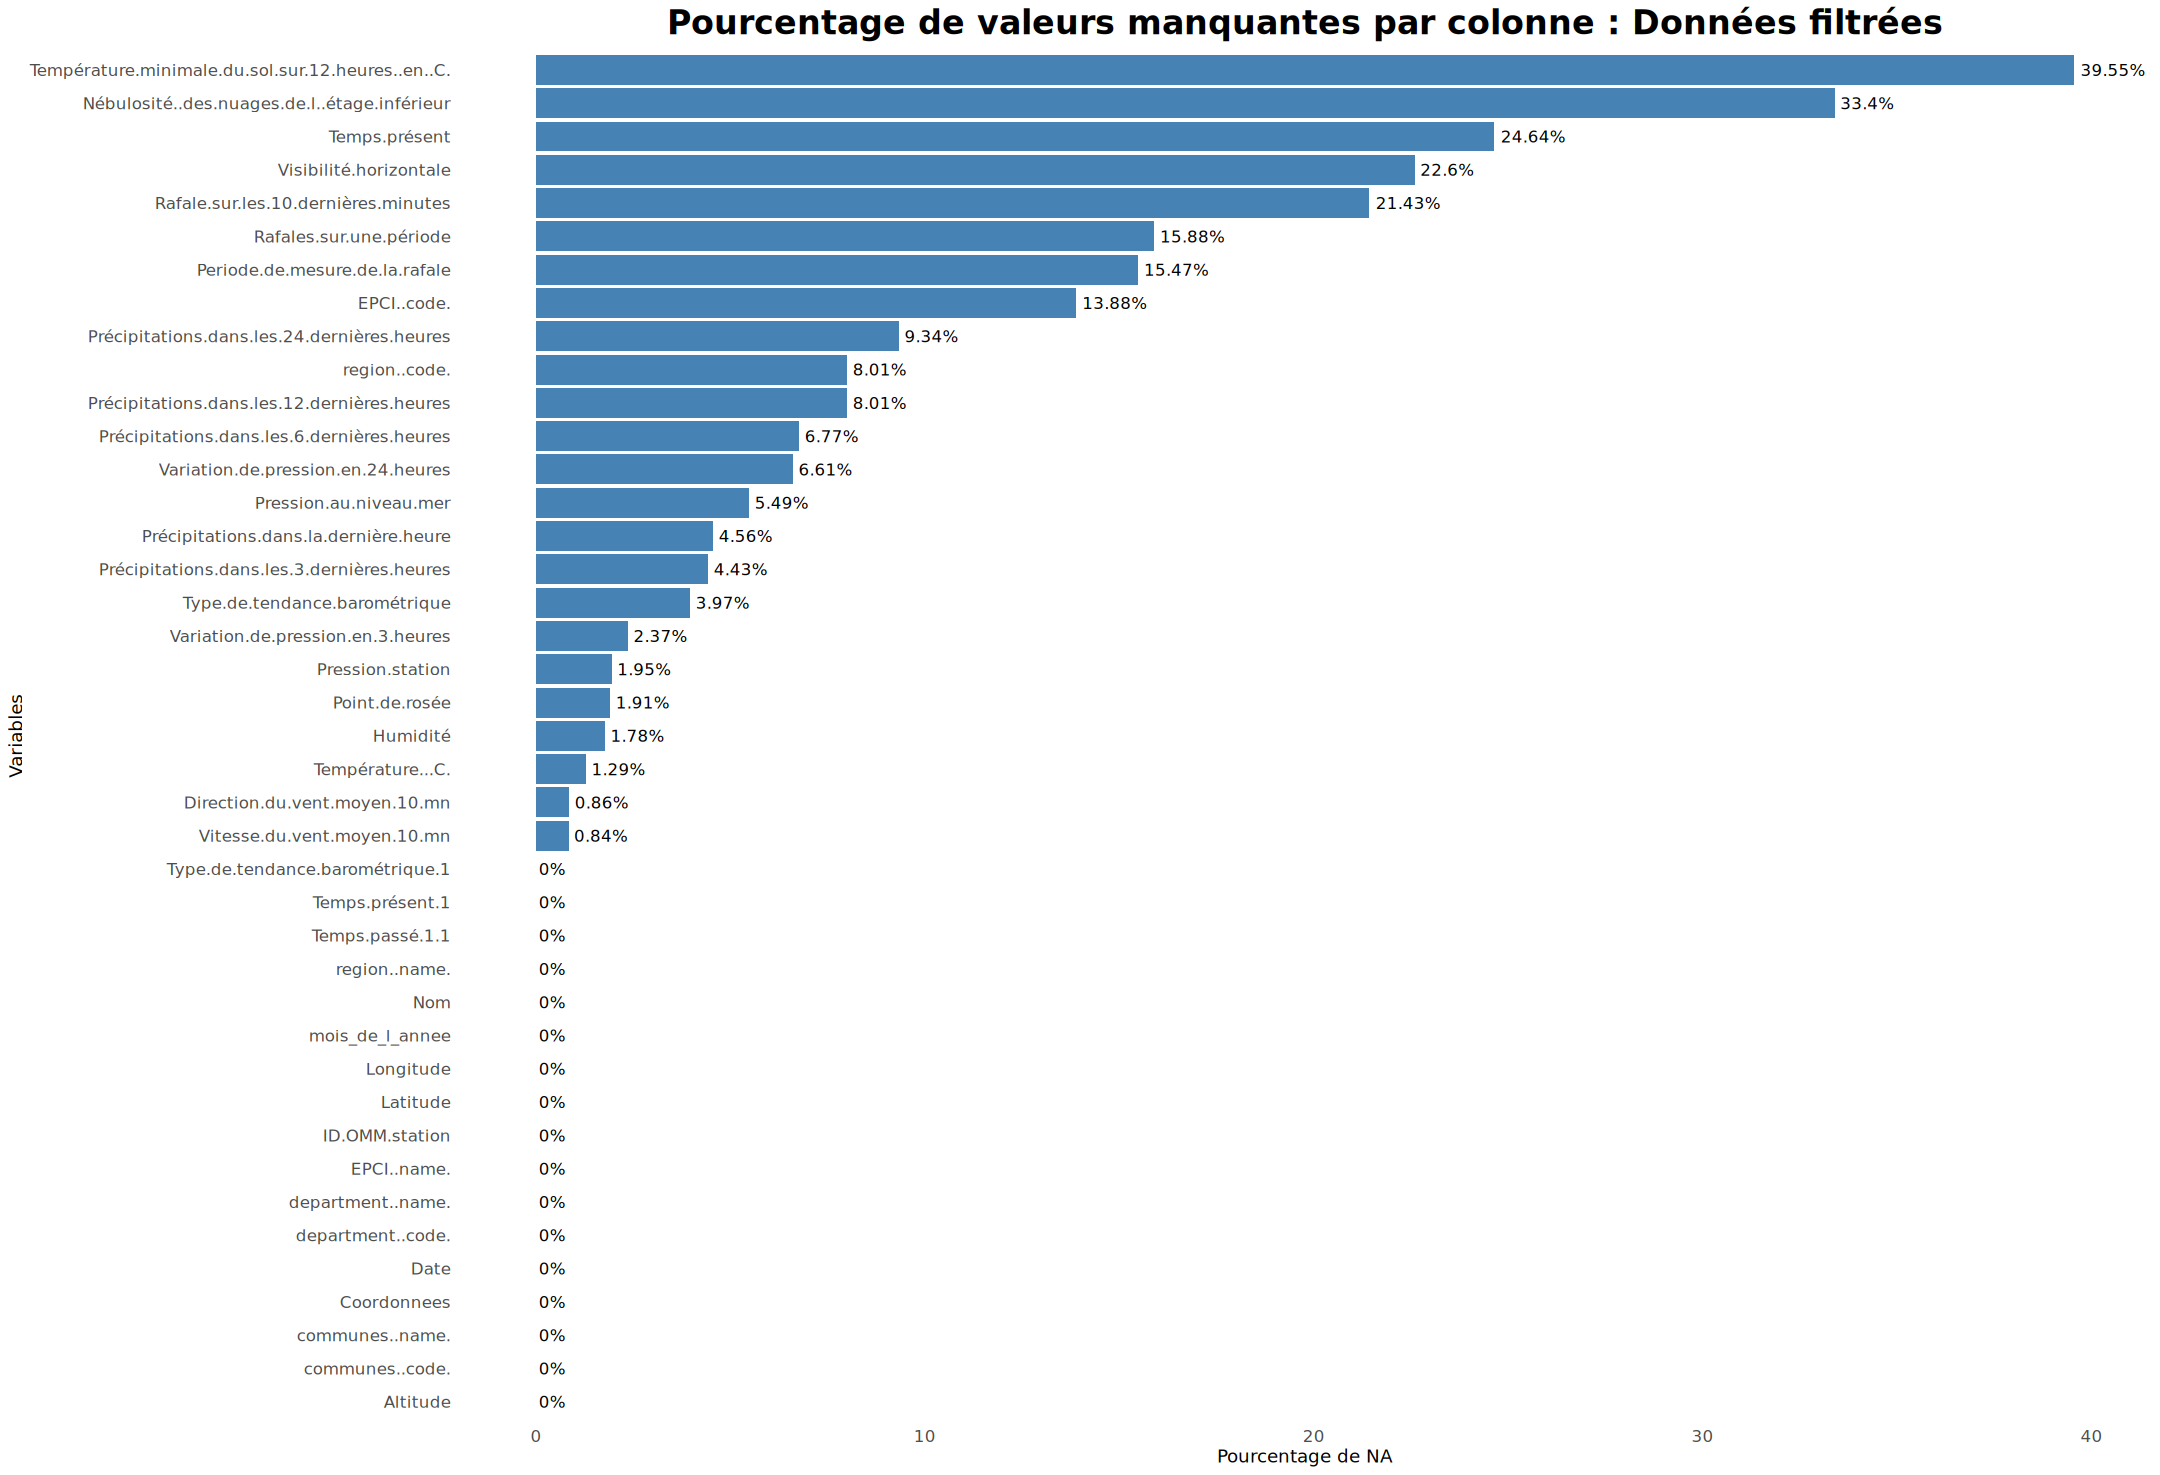

In [43]:
# Taille du graphique
options(repr.plot.width = 18, repr.plot.height = max(6, 0.3 * ncol(data_final)))

# Calcul du pourcentage de NA
na_percent <- sapply(data_final, function(x) mean(is.na(x)) * 100)
na_df <- data.frame(Variable = names(na_percent), NA_Percent = round(na_percent, 2))
na_df <- na_df[order(na_df$NA_Percent, decreasing = TRUE), ]

# Graphique
ggplot(na_df, aes(x = reorder(Variable, NA_Percent), y = NA_Percent)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(NA_Percent, "%")), hjust = -0.1, size = 3.5) +
  coord_flip() +
  labs(title = "Pourcentage de valeurs manquantes par colonne : Données filtrées",
       x = "Variables",
       y = "Pourcentage de NA") +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

cat("Noms des colonnes :", names(data_final), "\n")

### Analyse des données

#### Statistiques de base des valeurs numériques de data_final

In [44]:
# Sélection des colonnes numériques
numeric_data <- data_final[sapply(data_final, is.numeric)]

# Largeurs fixes
name_width <- 55
value_width <- 15

# En-tête
cat(sprintf("%-*s | %*s | %*s | %*s | %*s\n",
            name_width, "Variable",
            value_width, "Min",
            value_width, "Max",
            value_width, "Mean",
            value_width, "SD"))
cat(strrep("-", name_width + 15 + value_width * 4), "\n")

# Boucle d'affichage
for (colname in names(numeric_data)) {
  col <- numeric_data[[colname]]
  min_val <- round(min(col, na.rm = TRUE), 2)
  max_val <- round(max(col, na.rm = TRUE), 2)
  mean_val <- round(mean(col, na.rm = TRUE), 2)
  sd_val <- round(sd(col, na.rm = TRUE), 2)
  
  cat(sprintf("%-*s | %*.2f | %*.2f | %*.2f | %*.2f\n",
              name_width, colname,
              value_width, min_val,
              value_width, max_val,
              value_width, mean_val,
              value_width, sd_val))
}

Variable                                                |             Min |             Max |            Mean |              SD
---------------------------------------------------------------------------------------------------------------------------------- 
ID.OMM.station                                          |         7005.00 |        89642.00 |        26062.16 |        29911.14
Pression.au.niveau.mer                                  |        93850.00 |       107570.00 |       101576.62 |          913.15
Variation.de.pression.en.3.heures                       |        -2840.00 |         2990.00 |           15.39 |          126.79
Type.de.tendance.barométrique                          |            0.00 |           10.00 |            4.30 |            2.72
Direction.du.vent.moyen.10.mn                           |            0.00 |          360.00 |          175.63 |          104.55
Vitesse.du.vent.moyen.10.mn                             |            0.00 |           47.20 |        

#### Visualisation de toutes les colonnes numériques : Scatter plot de la température en fonction des colonnes numériques et Matrice de corrélation

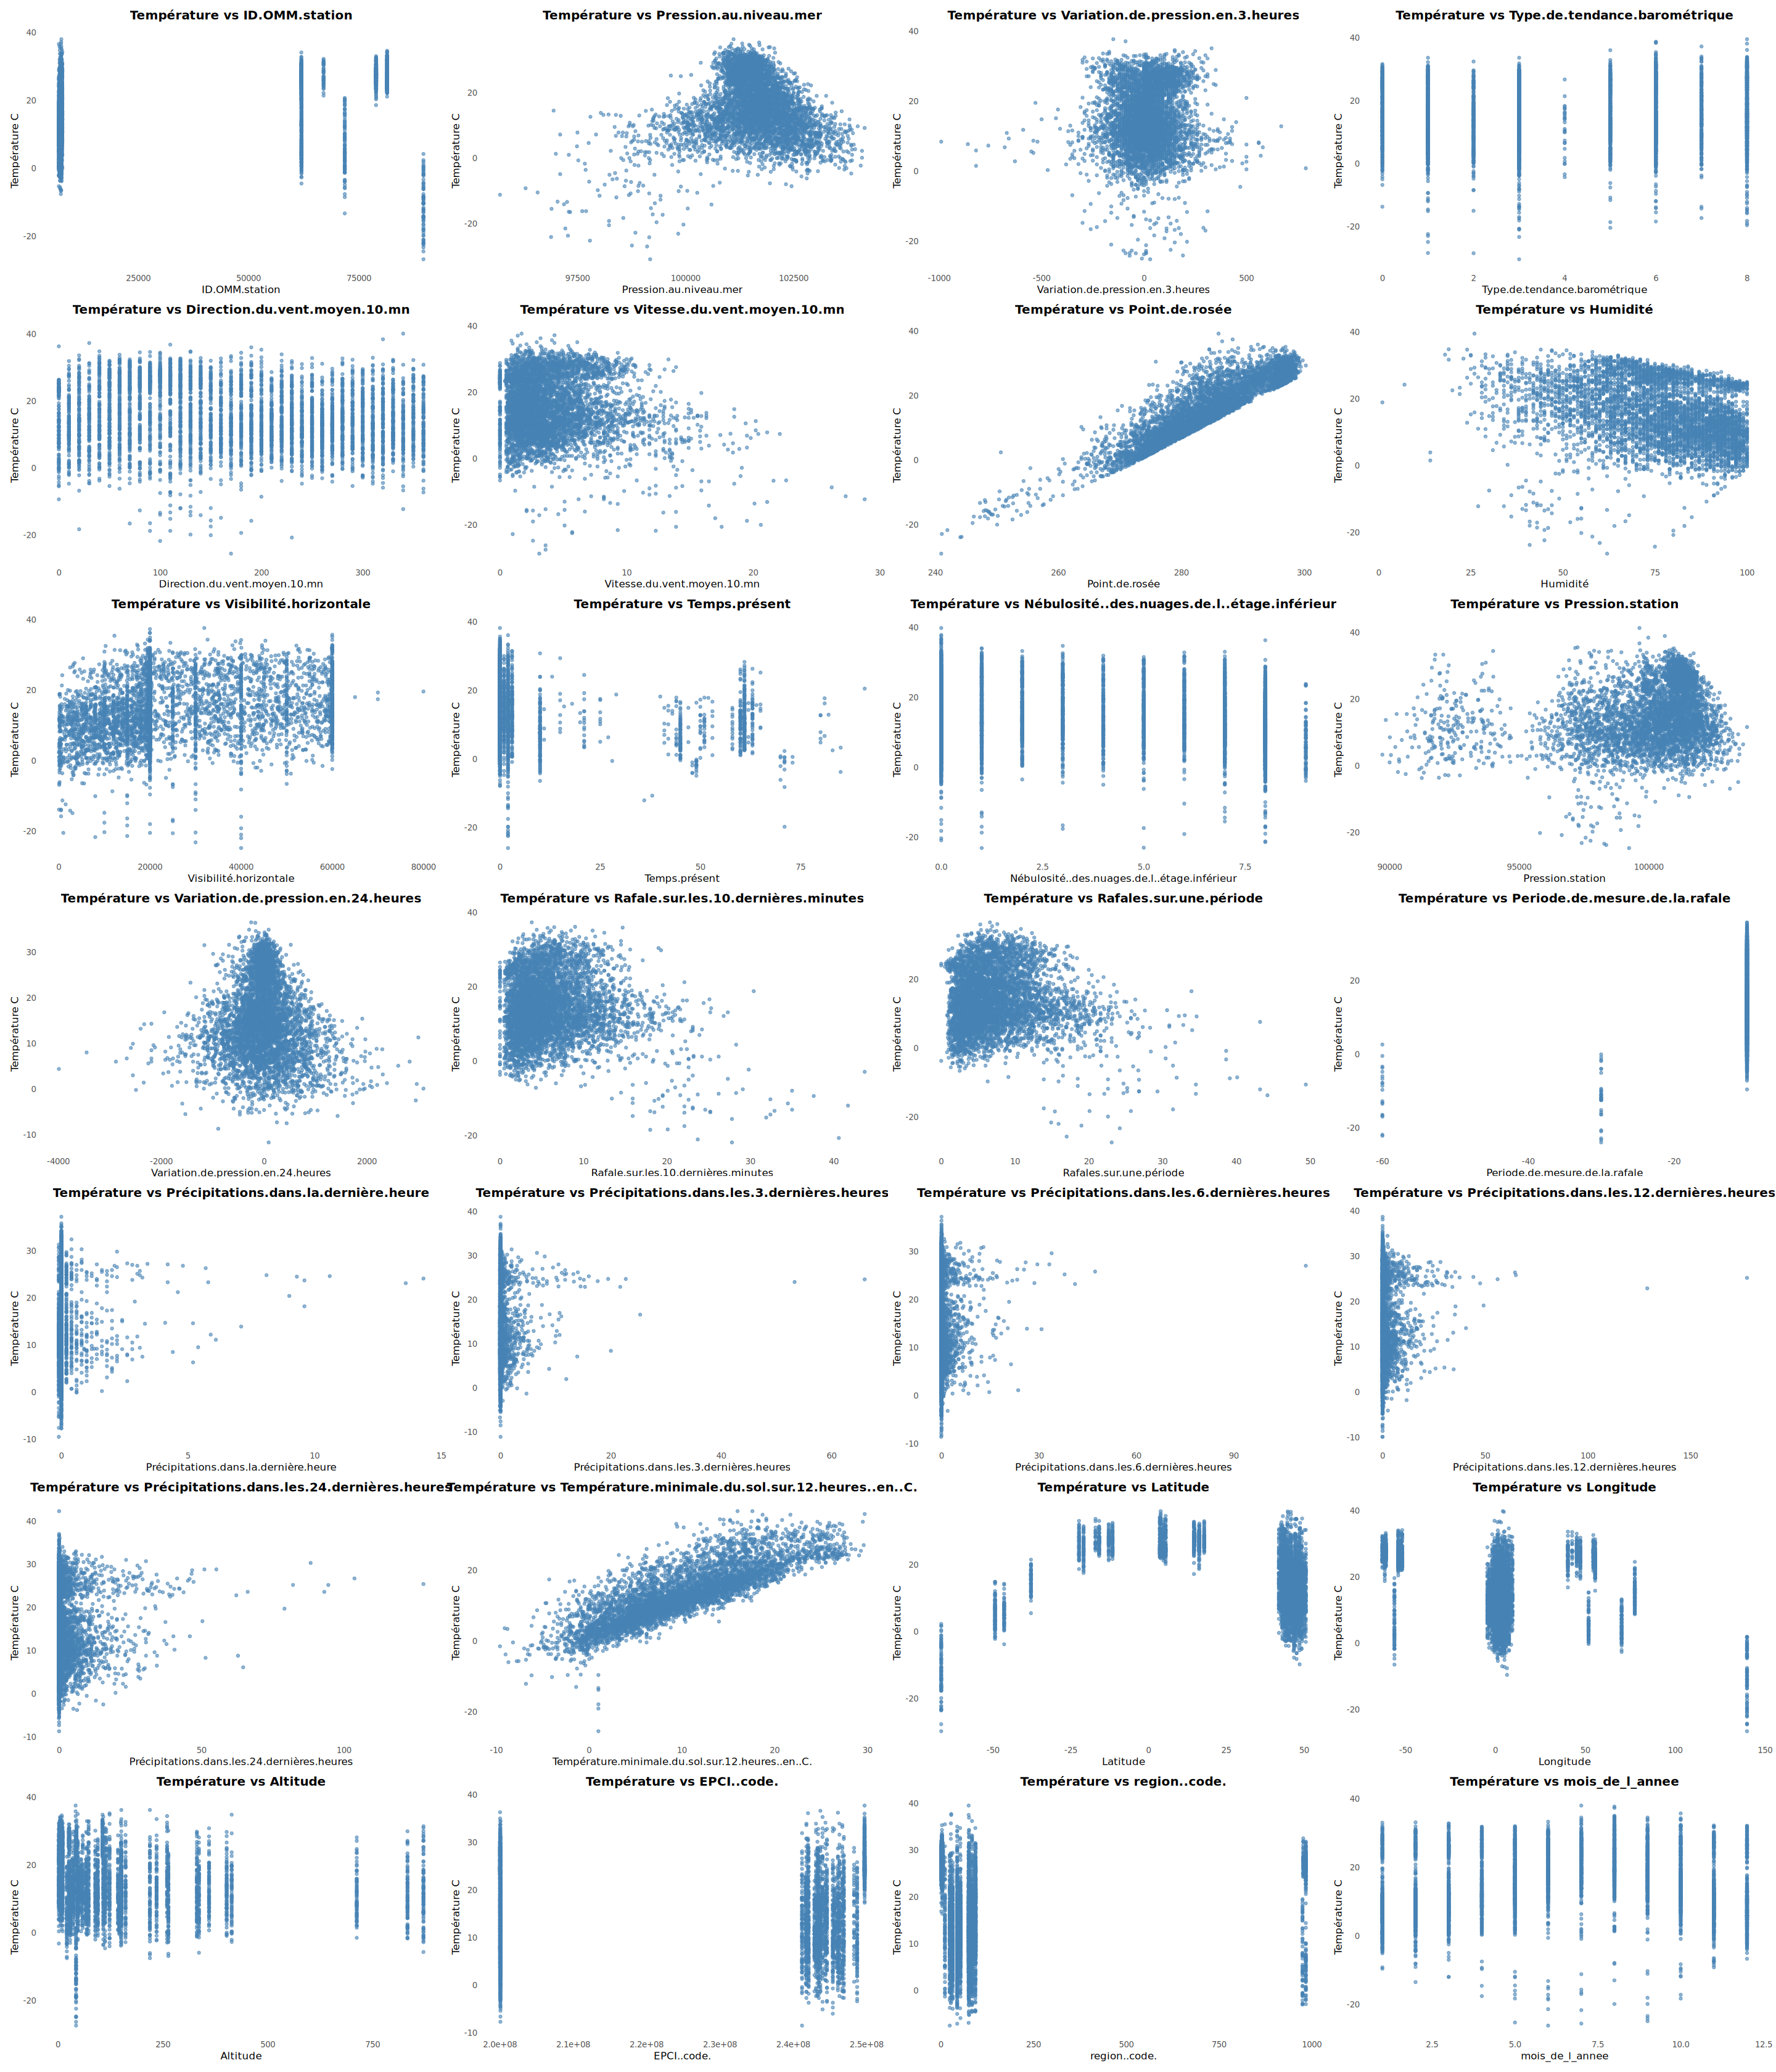

In [45]:
# Paramètres
num_col <- 4 # Nombre de colonnes dans la grille
max_points <- 5000  # Nombre max de points par plot pour éviter la surcharge

# Variable cible
target_var <- "Température...C."

# Sélection des variables numériques (hors cible)
numeric_vars <- names(data_final)[sapply(data_final, is.numeric)]
numeric_vars <- setdiff(numeric_vars, target_var)

# Construire les plots avec sous-échantillonnage en éliminant les NAs
plot_list <- lapply(numeric_vars, function(var) {
  df_clean <- data_final[!is.na(data_final[[var]]) & !is.na(data_final[[target_var]]), ]

  # Sous-échantillonnage
  if (nrow(df_clean) > max_points) {
    df_clean <- df_clean[sample(nrow(df_clean), max_points), ]
  }
  
  ggplot(df_clean, aes(x = .data[[var]], y = .data[[target_var]])) +
    geom_point(color = "steelblue", alpha = 0.6, size = 1.2) +
    labs(title = paste("Température vs", var),
         x = var,
         y = gsub("\\.+", " ", target_var)) +
    theme_minimal(base_size = 10) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 12),
      panel.grid = element_blank()
    )
})

# Ajuster la taille du canevas
options(repr.plot.width = 6 * num_col,
        repr.plot.height = 4 * ceiling(length(plot_list) / num_col))

# Afficher la grille
wrap_plots(plotlist = plot_list, ncol = num_col)

# Réinitialiser la taille du canevas
options(repr.plot.width = 7, repr.plot.height = 5)


Warning message in cor(numeric_data, use = "complete.obs"):
“the standard deviation is zero”


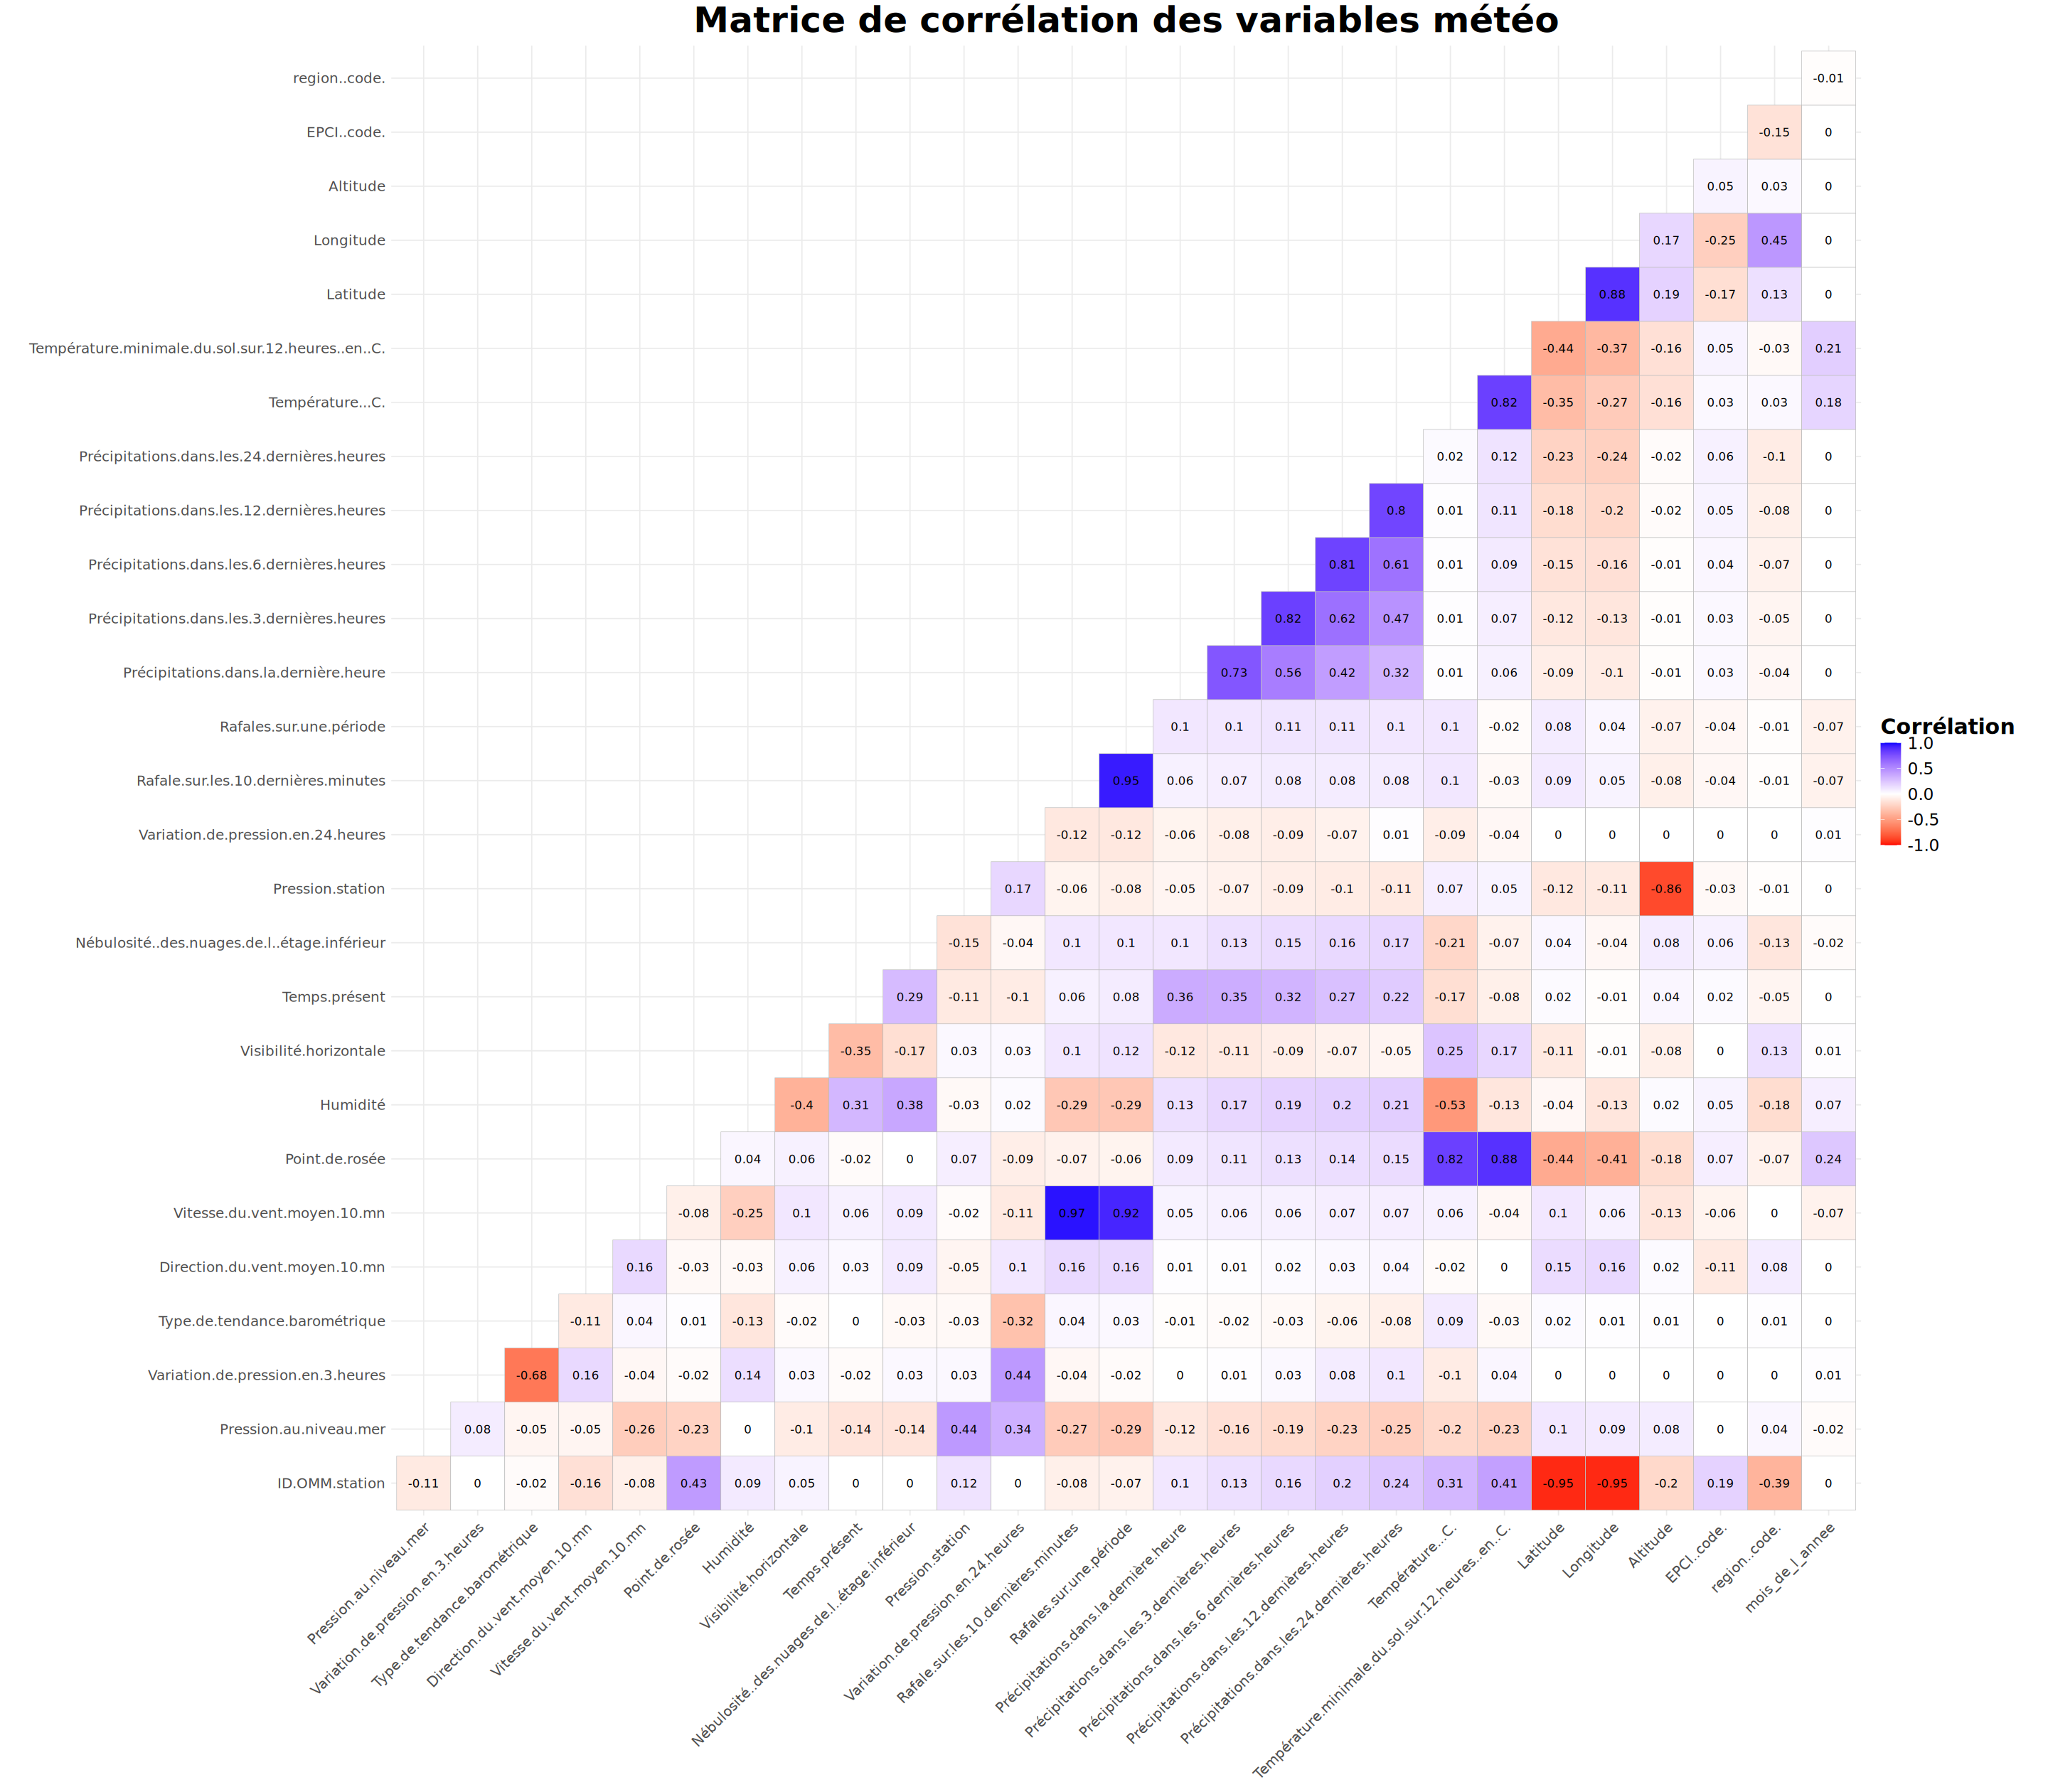

In [46]:
# Calculer la matrice de corrélation
cor_matrix <- cor(numeric_data, use = "complete.obs")

# Ajuster la taille du canevas
options(repr.plot.width = 6 * num_col,
        repr.plot.height = 3 * ceiling(length(plot_list) / num_col))

# Afficher la heatmap

ggcorrplot(cor_matrix,
           method = "square",          
           type = "lower",
           lab = TRUE,
           lab_size = 3.5,
           legend.title = "Corrélation",
           colors = c("red", "white", "blue"),
           title = "Matrice de corrélation des variables météo",
           ggtheme = theme_minimal() +
                     theme(
                       plot.title = element_text(hjust = 0.5, face = "bold", size = 30),
                       legend.title = element_text(size = 18, face = "bold"),
                       legend.text = element_text(size = 14)
                     )
)

# Réinitialiser la taille du canevas
options(repr.plot.width = 7, repr.plot.height = 5)


### Conclusion de l'analyse exploratoire

Nous avons choisi la température comme variable d’intérêt principal, ce qui nous a permis de recentrer l’analyse sur les colonnes les plus pertinentes du jeu de données. L’exploration statistique, à travers des indicateurs descriptifs, un scatter plot global et une matrice de corrélation, a mis en évidence des relations significatives entre les variables météorologiques. Ces visualisations vont faciliter l’interprétation des tendances et des interactions, ouvrant la voie à nos analyses suivantes.